In [110]:
# -----------------------------------------------------------
# 1) Import des bibliothèques nécessaires
# -----------------------------------------------------------
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from IPython.display import display, Math
# -----------------------------------------------------------
# 2) Récupération des données depuis Materials Project
# -----------------------------------------------------------
with MPRester("n58KMF7umZMAJXouXDJc0vORWlcEfEsD") as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id("mp-15794")

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Structure de bande

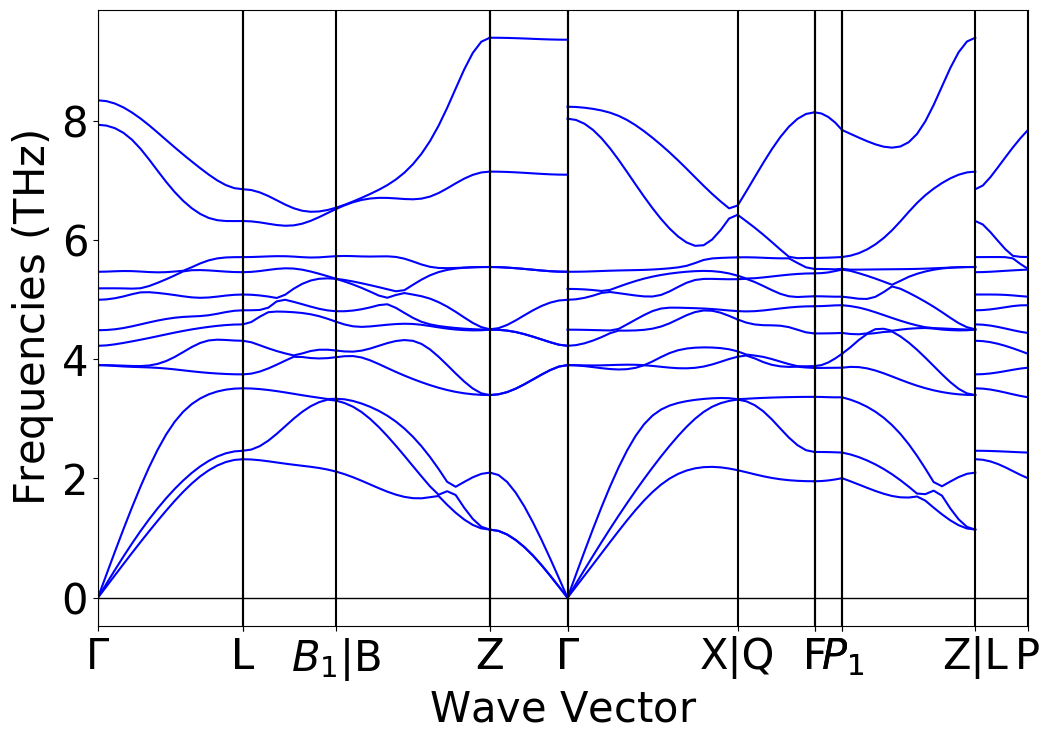

In [111]:
ph_bstruc = PhononBSPlotter(ph_bs)
ph_bstruc.show()

# Zone de Brillouin

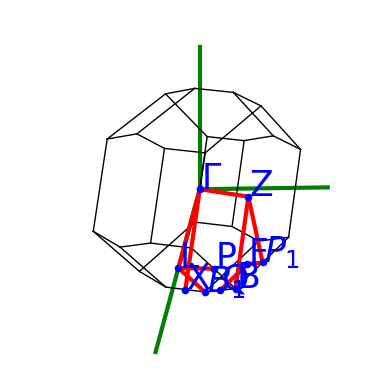

In [112]:
ph_bstruc.plot_brillouin()

# Calcul de la vitesse du son pour trois branches acoustiques différentes

Nous allons maintenant repérer les trois branches acoustiques que nous allons retenir ; il s’agit de celles dont la fréquence s’annule au point Γ. On peut les distinguer facilement sur la structure présentée ci-dessus.

Pour les trois directions à choisir, nous prendrons tout naturellement Γ–L, Z–Γ et Γ–X|Q, puisque les branches acoustiques manifestent un comportement linéaire aux abords de Γ, qui constitue l’origine de notre zone de Brillouin.

# Calcule de la vitesse du son 
La vitesse du son est calculé via la formule suivante 
v = dw/dq [m/s] 
Avec q notre vecteur d'onde et w la relation de dispersion du matériau
Il suffit donc de calculer la pente de de ces trois branches pour obtenir l vitesse du son pour ces mêmes branches 

In [113]:
A = 1e-10  # pour passer de Ångström à mètre
THz = 1e12 # pour passer de THz à Hz

1) Première branche acoustique

In [114]:
f_one = freq[0][0]
dw_one = (f_one[1] - f_one[0]) * THz
dq_one = (dist[0][1] - dist[0][0]) / A

pente_one = dw_one / dq_one

vs_one = 2 * np.pi * np.abs(pente_one)
print("La vitesse de propagation du son pour la première bande acoustique dans la direction Γ - X vaut " + str(vs_one) + " m/s.")

La vitesse de propagation du son pour la première bande acoustique dans la direction Γ - X vaut 2193.492350939146 m/s.


2) Deuxième brenche acoustique 

In [115]:
f_two = freq[3][1]
dw_two = (f_two[-1] - f_two[-2]) * THz
dq_two = (dist[3][-1] - dist[3][-2]) / A

pente_two = dw_two / dq_two

vs_two = 2 * np.pi * np.abs(pente_two)
print("La vitesse de propagation du son pour la seconde bande acoustique dans la direction Z - Γ vaut " + str(vs_two) + " m/s.")


La vitesse de propagation du son pour la seconde bande acoustique dans la direction Z - Γ vaut 2127.215069335858 m/s.


3) Troisième branche coustique 

In [116]:
f_third = freq[4][2]
dw_third = (f_third[1] - f_third[0]) * THz
dq_third = (dist[4][1] - dist[4][0]) / A

pente_third = dw_third / dq_third

vs_third = 2 * np.pi * np.abs(pente_third)
print("La vitesse de propagation du son pour la troisième bande acoustique dans la direction Γ - X|Q vaut " + str(vs_third) + " m/s.")


La vitesse de propagation du son pour la troisième bande acoustique dans la direction Γ - X|Q vaut 4553.860011579047 m/s.
